In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

## Fuente de datos

Los datos obtenidos provienen del ESPAC 

Las bases de datos a utilizarse son:
- Cultivos permanentes
- Cultivos transitorios
- Empleo
- Ganado vacuno

In [2]:
cp2021 = pd.read_spss("2021/cpnac2021.sav", usecols=['Identificador', 'cp_nclavr', 'rc_clacul', 'ual_prov', 'cp_k409ha', 'nuevacondicion', 'fact_exp_fin']).rename(
    columns={'cp_nclavr': 'nclavr', 'cp_k409ha': 'superficie', 'nuevacondicion': 'condicion'})
ct2021 = pd.read_spss("2021/ctnac2021.sav", usecols=['Identificador', 'ct_nclavr', 'rc_clacul', 'ual_prov', 'ct_k510ha', 'ct_nuevacondicion', 'fact_exp_fin']).rename(
    columns={'ct_nclavr': 'nclavr', 'ct_k510ha': 'superficie', 'ct_nuevacondicion': 'condicion'})

eu2021 = pd.read_spss("2021/eunac2021.sav", usecols=['Identificador',] + ['eu_k' + str(i) for i in range(1301, 1313, 3)] + ['fact_exp_fin'])

## Unificar cultivos permanentes y transitorio

1. Se concatenan las bases de cultivos permanentes y transitorios
2. Se agrupan las observaciones por `Identificador` y se unifican los cultivos iguales

In [3]:
cultivos = pd.concat([cp2021, ct2021]) # concatena las dos bases'ual_prov'
cultivos = pd.pivot_table(cultivos, values=['superficie', 'fact_exp_fin'], index=['Identificador', 'nclavr', 'rc_clacul', 'ual_prov'],
                          aggfunc={'superficie':sum, 'fact_exp_fin': np.mean}, observed=True).reset_index() # agrupando y unificando cultivos iguales

## Factor de expansión

Se aplican los factores de expansión a las variables seleccionandas, de acuerdo a la base procedente.

In [4]:
def aplicar_fac_exp(df):
    var_num = df.select_dtypes('float').drop('fact_exp_fin', axis=1).columns
    df[var_num] = df[var_num].apply(lambda x: x * df.fact_exp_fin)
    return df

eu2021 = aplicar_fac_exp(eu2021)

In [5]:
cultivos['sup_exp'] = cultivos['superficie'] * cultivos['fact_exp_fin']

In [6]:
cultivos

,Identificador,nclavr,rc_clacul,ual_prov,fact_exp_fin,superficie,sup_exp
0,01015164000991175,FREJOL SECO (GRANO SECO),FREJOL SECO (GRANO SECO),AZUAY,1.00,0.17,0.17
1,01015164000991175,MAIZ SUAVE SECO (GRANO SECO),MAIZ SUAVE SECO (GRANO SECO),AZUAY,1.00,0.17,0.17
2,01015164000991176,FREJOL TIERNO (VAINA),FREJOL TIERNO (VAINA),AZUAY,1.00,0.24,0.24
3,01015164000991176,MAIZ SUAVE CHOCLO (CHOCLO),MAIZ SUAVE CHOCLO (CHOCLO),AZUAY,1.00,0.24,0.24
4,01015201145250001,FREJOL SECO (GRANO SECO),FREJOL SECO (GRANO SECO),AZUAY,25.26,0.09,2.27
...,...,...,...,...,...,...,...
27406,24015504000550004,OTROS PERMANENTES,CIRUELO,SANTA ELENA,8.49,1.49,12.65
27407,24015504000550006,OTROS PERMANENTES,CIRUELO,SANTA ELENA,8.64,0.50,4.32
27408,24015504000550010,BANANO DE EXPORTACIÓN (FRUTA FRESCA),BANANO DE EXPORTACION,SANTA ELENA,30.89,0.50,15.44
27409,24015504000550010,CACAO (ALMENDRA SECA),CACAO FINO DE AROMA (ALMENDRA SECA),SANTA ELENA,26.76,6.00,160.58


## Uniendo bases

Se fusionan las bases de cultivos (permanentes y trnasitorios) con la base de empleo

In [7]:
consolidado = pd.merge(cultivos , eu2021, on = 'Identificador') # Empleo + Cultivos

In [8]:
consolidado

,Identificador,nclavr,rc_clacul,ual_prov,fact_exp_fin_x,superficie,sup_exp,eu_k1301,eu_k1304,eu_k1307,eu_k1310,fact_exp_fin_y
0,01015164000991175,FREJOL SECO (GRANO SECO),FREJOL SECO (GRANO SECO),AZUAY,1.00,0.17,0.17,1.00,1.00,NaN,NaN,1.00
1,01015164000991175,MAIZ SUAVE SECO (GRANO SECO),MAIZ SUAVE SECO (GRANO SECO),AZUAY,1.00,0.17,0.17,1.00,1.00,NaN,NaN,1.00
2,01015164000991176,FREJOL TIERNO (VAINA),FREJOL TIERNO (VAINA),AZUAY,1.00,0.24,0.24,3.00,1.00,NaN,2.00,1.00
3,01015164000991176,MAIZ SUAVE CHOCLO (CHOCLO),MAIZ SUAVE CHOCLO (CHOCLO),AZUAY,1.00,0.24,0.24,3.00,1.00,NaN,2.00,1.00
4,01015201145250001,FREJOL SECO (GRANO SECO),FREJOL SECO (GRANO SECO),AZUAY,25.26,0.09,2.27,270.06,270.06,NaN,NaN,270.06
...,...,...,...,...,...,...,...,...,...,...,...,...
27406,24015504000550004,OTROS PERMANENTES,CIRUELO,SANTA ELENA,8.49,1.49,12.65,43.23,43.23,NaN,NaN,8.65
27407,24015504000550006,OTROS PERMANENTES,CIRUELO,SANTA ELENA,8.64,0.50,4.32,19.01,19.01,NaN,NaN,9.51
27408,24015504000550010,BANANO DE EXPORTACIÓN (FRUTA FRESCA),BANANO DE EXPORTACION,SANTA ELENA,30.89,0.50,15.44,88.41,12.63,37.89,37.89,12.63
27409,24015504000550010,CACAO (ALMENDRA SECA),CACAO FINO DE AROMA (ALMENDRA SECA),SANTA ELENA,26.76,6.00,160.58,88.41,12.63,37.89,37.89,12.63


## Selección de monocultivos

Se hace un recuento de los cultivos por productor, filtrando solamente los que sean monocultivo.

In [9]:
#agregando un campo que cuente el numero de cultivos por productor
conteo_cultivos = consolidado.groupby('Identificador')['nclavr'].count()
consolidado['num_cul'] = consolidado['Identificador'].apply(lambda x: conteo_cultivos[x])

In [10]:
# Filtro de monocultivos permanentes y transitorios
monocultivo = consolidado[(consolidado['num_cul'] == 1)]

## Descartando registros con producción pecuaria

1. Se fusiona la base de monocultivos con la base de ganado vacuno
2. Se filtran las observaciones con hasta 4 cabezas de ganado

In [11]:
#ganado vacuno
gl2021 = pd.read_spss("2021/glnac2021.sav", usecols=['Identificador', 'gl_superficie_ha', 'gl_k801'])
monocultivo = pd.merge(monocultivo, gl2021, how='left')
monocultivo.gl_k801.fillna(0, inplace=True)
monocultivo = monocultivo[monocultivo.gl_k801 <= 4]

## Creación de grupos por superficie

Se crea el campo `grupos de superficie` para agrupar por tamaños

| **Grupo**     | **Descripción**                     |
|---------------|-------------------------------------|
| 1[0 - 1)      | Menos de 1 hectárea                 |
| 2[1 - 2)      | De 1 hasta menos de 2 hectáreas     |
| 3(2 - 3]      | De 2 hasta menos de 3 hectáreas     |
| 4[3 - 5)      | De 3 hasta menos de 5 hectáreas     |
| 5[5 - 10)     | De 5 hasta menos de 10 hectáreas    |
| 6[10 - 20)    | De 10 hasta menos de 20 hectáreas   |
| 7[20 - 50)    | De 20 hasta menos de 50 hectáreas   |
| 8[50 - 100)   | De 50 hasta menos de 100 hectáreas  |
| 9[100 - 200)  | De 100 hasta menos de 200 hectáreas |
| X[200 -> inf) | Más de 200 hectáreas                |

In [12]:
def grupos_sup (x):
    if x<1: return '1[0 - 1)'
    elif x<2: return '2[1 - 2)'
    elif x<3: return '3[2 - 3)'
    elif x<5: return '4[3 - 5)'
    elif x<10: return '5[5 - 10)'
    elif x<20: return '6[10 - 20)'
    elif x<50: return '7[20 - 50)'
    elif x<100: return '8[50 - 100)'
    elif x<200: return '9[100 - 200)'
    elif x>200: return 'X[200 -> inf)'

In [13]:
monocultivo['grupo'] = monocultivo['superficie'].apply(grupos_sup)
#monocultivo = monocultivo[monocultivo.grupo != '1[0 - 1)']

## Cálculo del coeficiente

1. Se agrupan los monocultivos por tipo de cultivo
2. El factor `trabajadores por hectárea`es el cociente resultante de la división de la cantidad de trabajadores por la superficie total por cultivo

In [14]:
# Se agrupa por cultivo, provincia y grupo de superficie las variables trabajadores totales y superficie plantada
densidad = monocultivo.groupby(['nclavr', 'grupo'], observed=False, as_index=True).agg(
    recuento=('superficie', 'count'), trabajadores=('eu_k1301', sum) , superficie=('sup_exp',sum))
densidad['trab/ha'] = densidad.trabajadores / densidad.superficie
densidad = densidad.sort_index()

In [15]:
x = densidad['trab/ha'].unstack().T
x

nclavr,OTROS PERMANENTES,AGUACATE (FRUTA FRESCA),ARROZ (EN CÁSCARA),ARVEJA SECA (GRANO SECO),ARVEJA TIERNA (VAINA),BANANO DE EXPORTACIÓN (FRUTA FRESCA),BROCOLI,CACAO (ALMENDRA SECA),CAFÉ (GRANO ORO),CAÑA DE AZÚCAR / AZÚCAR (TALLO FRESCO),...,PAPA,PIÑA (FRUTA FRESCA),PLÁTANO (FRUTA FRESCA),QUINUA,SOYA,TABACO,TOMATE DE ÁRBOL (FRUTA FRESCA),TOMATE RIÑON,TRIGO,YUCA
grupo,,,,,,,,,,,,,,,,,,,,,
1[0 - 1),5.45,4.50,2.66,6.92,7.25,4.91,6.68,2.70,3.53,1.81,...,6.46,2.02,3.12,6.21,2.58,NaN,8.32,23.35,4.09,5.09
2[1 - 2),1.45,1.16,1.15,2.25,0.85,1.37,2.48,1.21,2.59,3.02,...,3.71,0.97,1.16,1.39,1.00,NaN,4.24,1.91,1.80,0.98
3[2 - 3),0.90,1.05,0.78,NaN,0.30,1.41,NaN,0.77,1.07,1.00,...,1.49,1.50,0.77,NaN,0.69,NaN,4.50,NaN,0.46,0.65
4[3 - 5),0.61,0.62,0.42,NaN,0.58,2.93,NaN,0.56,0.63,0.40,...,0.91,7.82,0.65,NaN,0.59,NaN,NaN,NaN,0.19,0.47
5[5 - 10),0.86,1.42,0.34,NaN,NaN,3.24,NaN,0.40,0.38,0.26,...,0.33,NaN,0.42,0.25,0.47,NaN,NaN,1.05,0.28,NaN
6[10 - 20),0.33,1.47,0.13,NaN,NaN,1.77,0.25,0.25,0.16,0.23,...,0.44,NaN,0.36,NaN,NaN,3.61,NaN,NaN,0.14,NaN
7[20 - 50),0.06,0.16,0.14,NaN,NaN,0.71,0.13,0.21,0.90,0.15,...,NaN,3.49,0.39,0.04,0.22,2.48,NaN,NaN,0.01,NaN
8[50 - 100),NaN,NaN,0.11,NaN,NaN,0.66,0.10,0.10,0.01,0.08,...,NaN,0.45,0.01,NaN,0.27,0.67,NaN,NaN,NaN,0.02
9[100 - 200),0.16,NaN,0.11,NaN,NaN,0.66,0.35,0.19,0.02,0.08,...,NaN,0.53,NaN,NaN,NaN,1.40,NaN,NaN,NaN,NaN


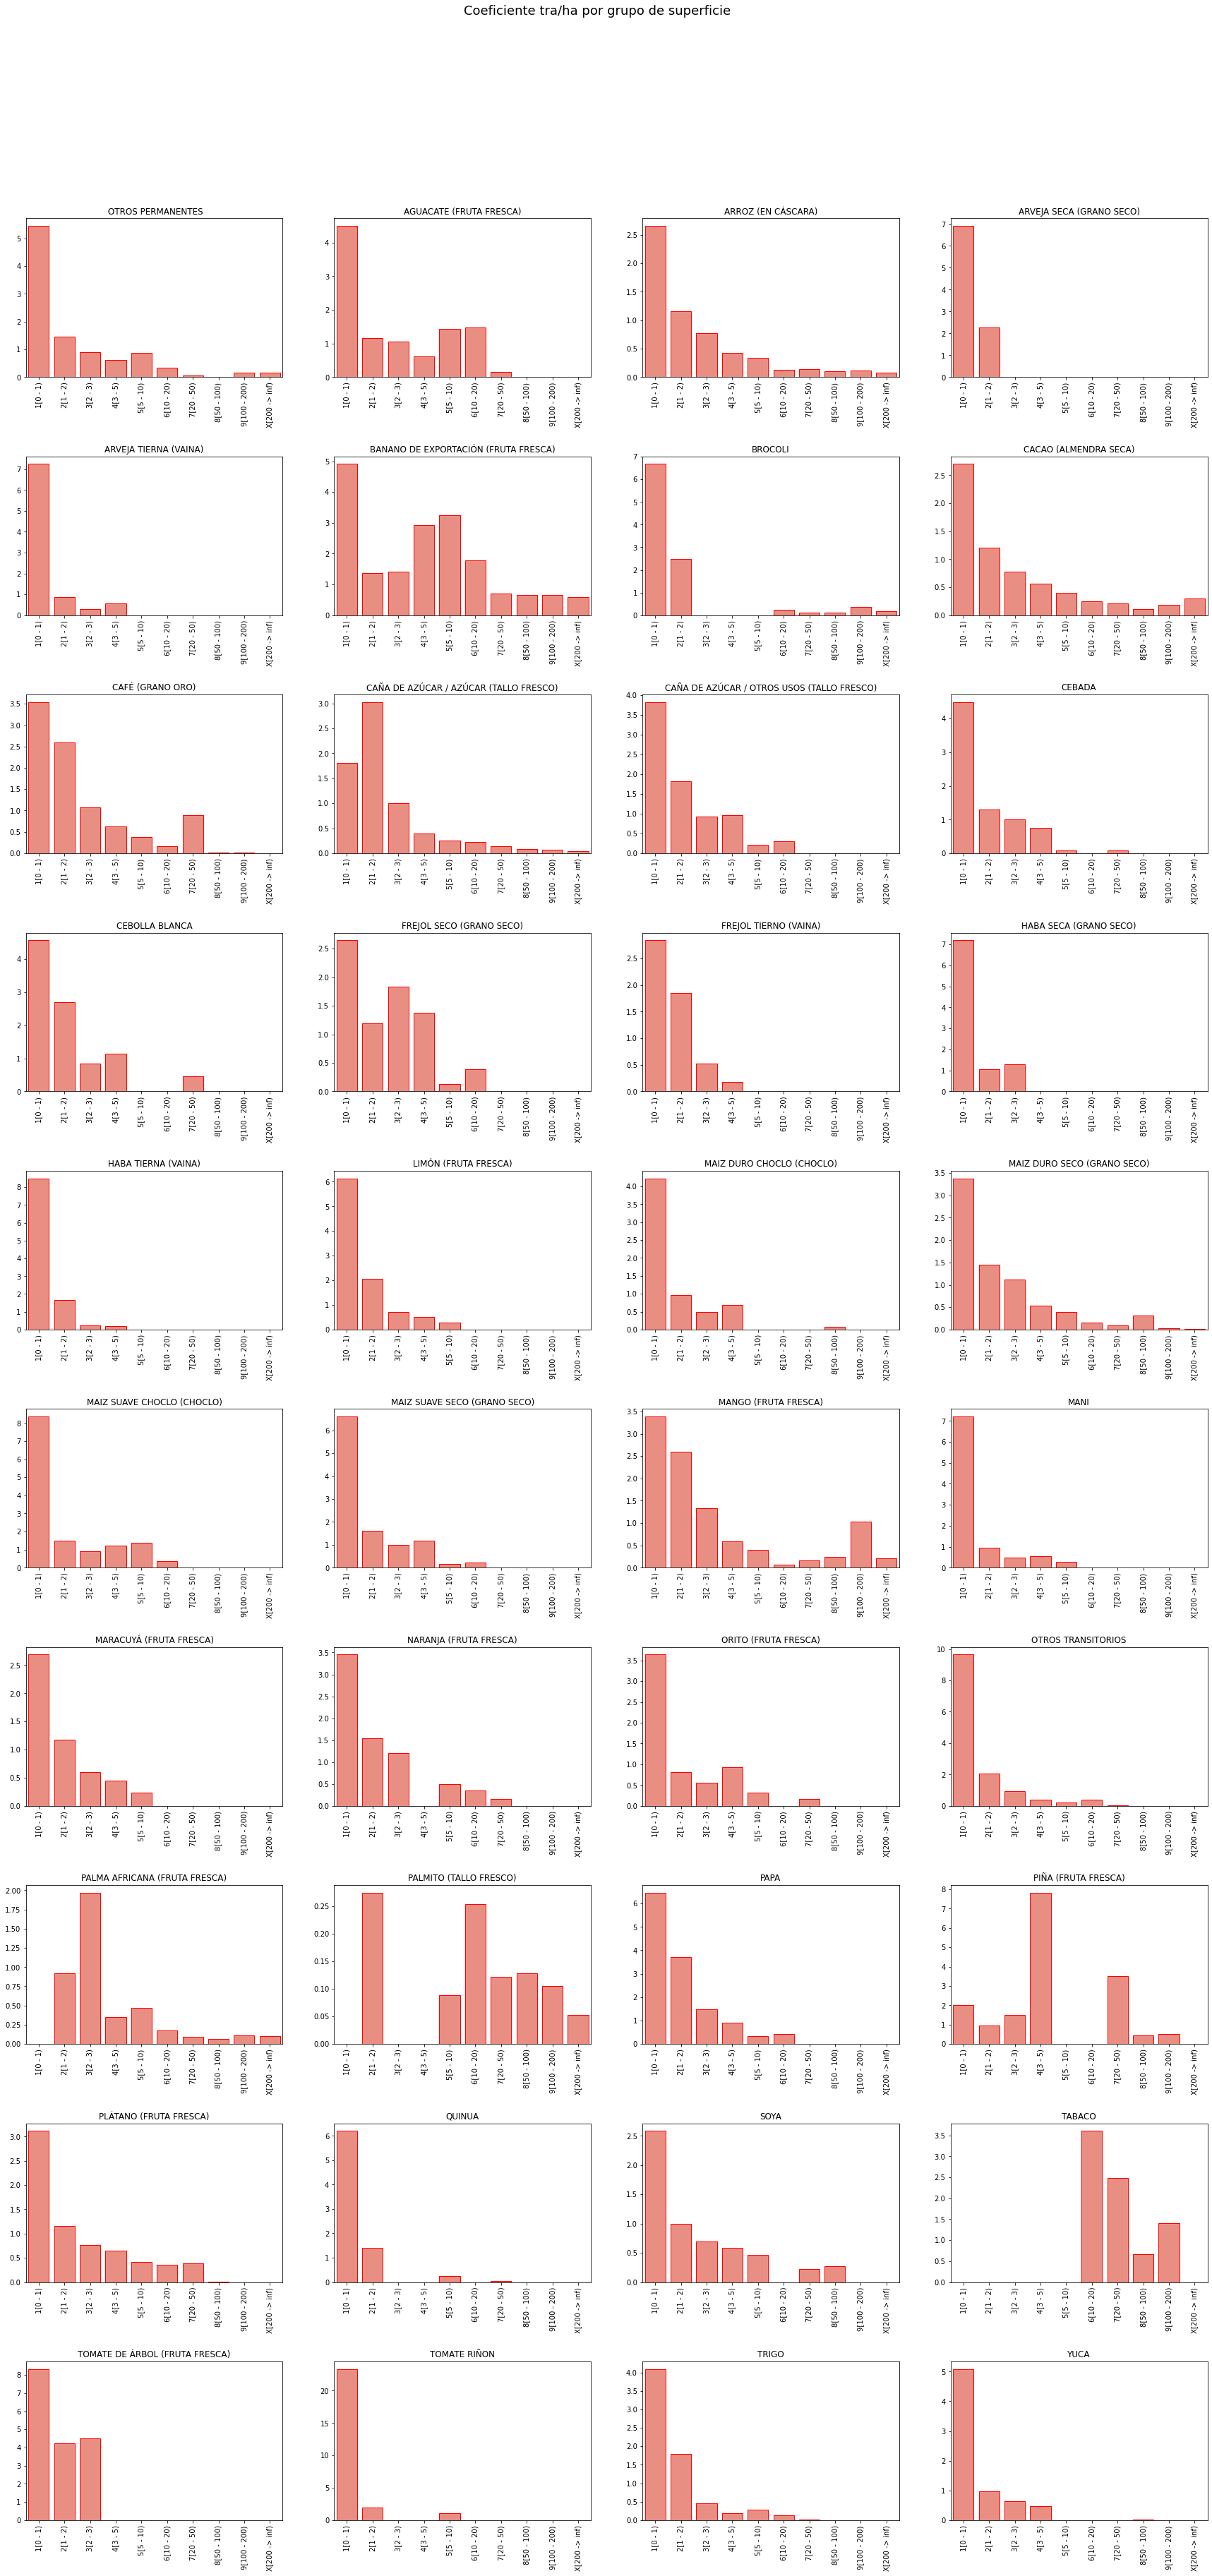

In [16]:
fig, axs = plt.subplots(nrows=10, ncols=4, figsize=(30, 60))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Coeficiente tra/ha por grupo de superficie", fontsize=18, y=0.95)

for i, ax in zip(x, axs.ravel()):

    sns.barplot(data=x, x=x[i].index, y=i, color='salmon', edgecolor='r', ax = ax)

    ax.set_title(i.upper())
    ax.set_xlabel("")
    ax.set_ylabel("") 
    ax.tick_params(axis='x', labelrotation = 90)

plt.show()
